The scikit-learn classifiers are considered on the problem of classification of Fisher-Anderson irises, the description of which is given in the form of a set of data on 150 iris specimens, 50 specimens from the following three types (Fig. 1):

iris setosa;
iris versicolor;
iris virginica.

In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Все переменные должны быть в одном масштабе перед применением PCA, в противном случае функция с большими значениями будет доминировать в результате. Ниже я используюStandardScalerв scikit-learn стандартизировать функции набора данных в единичном масштабе (среднее = 0 и дисперсия = 1).

In [4]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
x = df.loc[:, variables].values
y = df.loc[:,['class']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

Стандартизированные функции

Есть четыре особенности в исходных данных. Таким образом, PCA предоставит такое же количество основных компонентов.

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


Основные компоненты для набора данных IRIS
Какие различия объясняются каждым из основных компонентов? использованиеpca.explained_variance_ratio_вернуть вектор дисперсии:

Он показывает, что первый основной компонент составляет 72,22% дисперсии, второй, третий и четвертый - 23,9%, 3,68% и 0,51% соответственно. Можно сказать, что 72,22 + 23,9 = 96,21% информации собираются первыми и вторыми основными компонентами. Мы часто хотим оставить только существенные черты и отбросить незначительные. Основное правило заключается в том, чтобы сохранить главные главные компоненты, которые улавливают значительную дисперсию, и игнорировать мелкие.

In [6]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


Мы можем построить результаты, используя первые два компонента. Давайте добавим целевую переменную y к новым данным x_pca:

In [7]:
x_pca['class']=y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4','class']
x_pca.head()

,PC1,PC2,PC3,PC4,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


Результат показывает, что данные отделимы в новом пространстве.

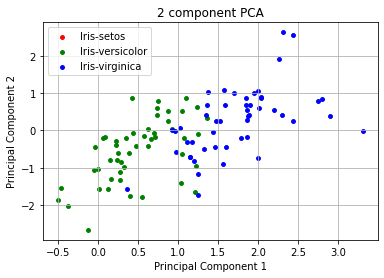

<Figure size 7200x3600 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setos', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
 indicesToKeep = x_pca['class'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 15)
ax.legend(targets)
ax.grid()

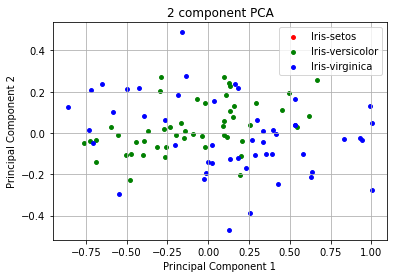

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setos', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['class'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC3']
 , x_pca.loc[indicesToKeep, 'PC4']
 , c = color
 , s = 15)
ax.legend(targets)
ax.grid()

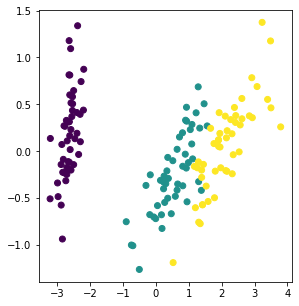

In [17]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
iris = load_iris()

X_pca = PCA().fit_transform(iris.data)
plt.figure(figsize=(10, 5))

plt.subplot(122)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

Performing the Multiple Linear Regression
Once you added the data into Python, you may use both sklearn to get the regression results.

In [15]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

X=df[['sepal-length', 'sepal-width', 'petal-length']]
Y = df['petal-width']

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
pc1 = 4.6
pc2 = 3.1
pc3 = 1.5

print ('Predicted : \n', regr.predict([[pc1 ,pc2, pc3]]))

Intercept: 
 -0.248723586024455
Coefficients: 
 [-0.21027133  0.22877721  0.52608818]
Predicted : 
 [0.28236993]
